In [1]:
import numpy as np
import os

In [62]:
from scipy.io import FortranFile
import numpy as np

f = FortranFile("arepo_out", "r")


header = f.read_reals(np.int32)
pos = f.read_reals(np.double).reshape((3, header[0]))
vels = f.read_reals(np.double).reshape((3, header[0]))
pIDs = f.read_reals(np.double)
pMass = f.read_reals(np.double)
pEnergy = f.read_reals(np.double)


print(np.shape(pos))
print(np.shape(vels))
print(np.shape(pIDs))
print(np.shape(pMass))
print(np.shape(pEnergy))
print(header)


(3, 1093627)
(3, 1093627)
(1093627,)
(1093627,)
(1093627,)
[    1093627           0           0           0           0           0
           0           0           0           0           0           0
           0           0     1093627           0           0           0
           0           0           0           1           0           0
           0           0           0           0           0           0
           0           0     1093627           0           0   -35261186
  1188596348 -2049400832  1131820119           0           0           0
           0           0           0           0           0           0
           0           0           0           0           0           0
           0           0           0           0           0           0
           0           0           0           0]


In [43]:
from scipy.io import FortranFile

ff = FortranFile("vel3D.bin", "r")

v = ff.read_reals()

np.shape(v)

(2097152,)

In [66]:
from scipy.io import FortranFile

f = FortranFile(filename, "r")

velx = f.read_reals().reshape((128,128,128))
vely = f.read_reals()
velz = f.read_reals()


In [3]:
n = np.zeros((2,2,2))

n[0,0,0]

0.0

In [5]:
from turbulence import turbulenceFromFile

velx, vely, velz = turbulenceFromFile(128, "vel3D.bin")

np.dtype(velx[0,0,0])

dtype('float64')

In [1]:
import numpy as np

np.int8("P")

ValueError: invalid literal for int() with base 10: 'P'

In [7]:
from scipy.io import FortranFile
import numpy as np

f = FortranFile("uniformSphere_000")

h = f.read_ints()
p = f.read_reals()
v = f.read_reals()
i = f.read_ints()
m = f.read_reals()
e = f.read_reals()

print(h)
ngas = len(i)
print(np.shape(p))
p = np.reshape(p, (3, ngas))
x = p[0]
y = p[1]
z = p[2]
print(len(h))

print(np.shape(p))
print(v)
print(m)
print(e)

[102000      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0 102000      0      0      0      0      0
      0      1      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      1
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0]
(306000,)
64
(3, 102000)
[3.98354731 0.87512302 0.80101959 ... 0.         0.         0.        ]
[0.00025  0.00025  0.00025  ... 0.000125 0.000125 0.000125]
[1.00567448 1.00567448 1.00567448 ... 2.01134897 2.01134897 2.01134897]


In [8]:
print(p[0])

[313.52408521 182.18465357 271.70846308 ... 304.4429228  253.59118724
 239.54124721]


In [9]:
print(i)

[     1      2      3 ... 101998 101999 102000]


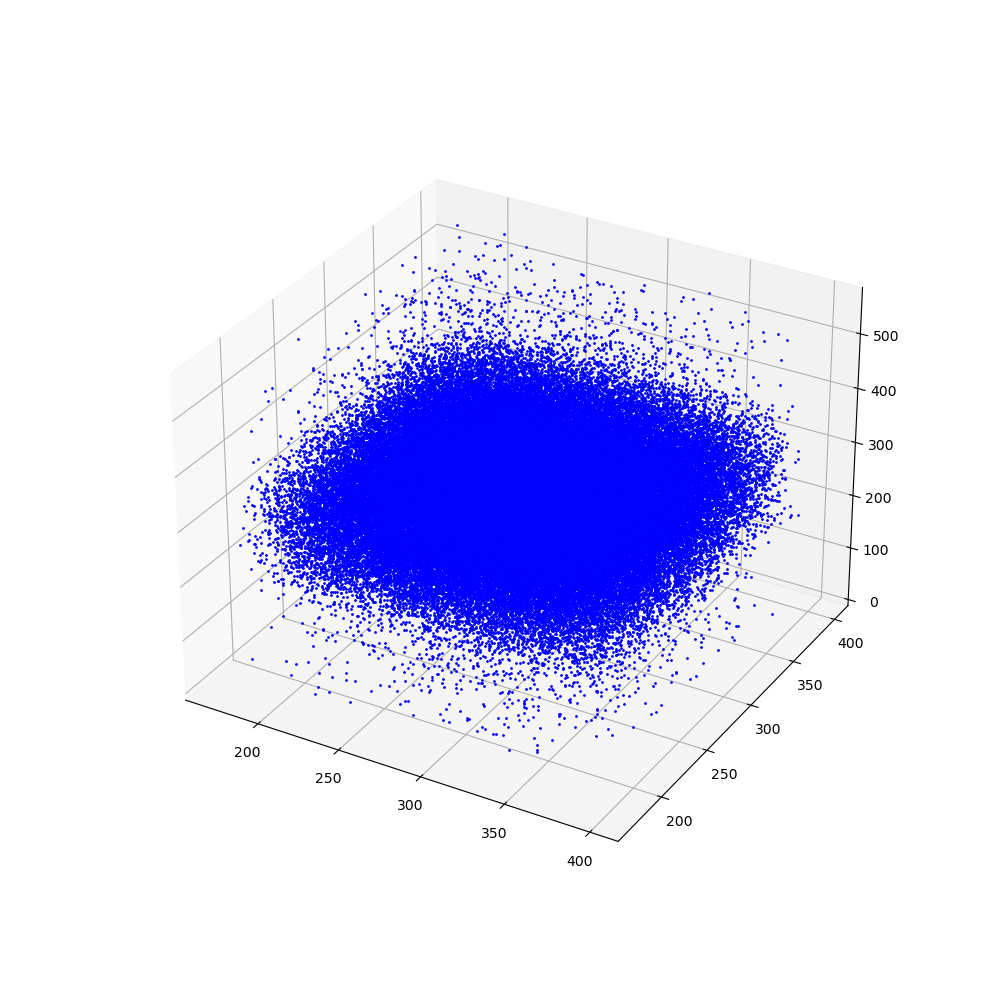

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(projection="3d")
plt.plot(x, y, z, "bo", markersize=1)

In [5]:
from scipy.io import FortranFile
import numpy as np

f = FortranFile("n100cc_m1000_vir.dat")

h = f.read_ints()
p = f.read_reals()
v = f.read_reals()
i = f.read_ints()
m = f.read_reals()
e = f.read_reals()

print(h)
print(len(h))
print(p)
print(v)
print(i)
print(m)
print(e)

ngas = len(i)
print(np.shape(p))
print(np.shape(v))
print(np.shape(i))


p = np.reshape(p, (3, ngas))
x = p[0]
y = p[1]
z = p[2]

print(np.max(p))

[    2040000           0           0           0           0           0
           0           0           0           0           0           0
           0           0           0           0           0           0
           0           0           0           0           0           0
     2040000           0           0           0           0           0
           0           1           0           0           0           0
           0           0           0           0           0           0
           0           0           0           0           0           0
  1166138684  1115944581   -35261186  1188596348 -2049400832  1131820119
           0           0           0           0           0           0
           0           0           0           0]
64
[265.93453979 331.74154663 383.11065674 ... 185.47149658 550.96209717
 254.4418335 ]
[-0.87763613  1.07296634 -0.88174528 ...  0.          0.
  0.        ]
[      1       2       3 ... 2039998 2039999 2040000]
[0.0005

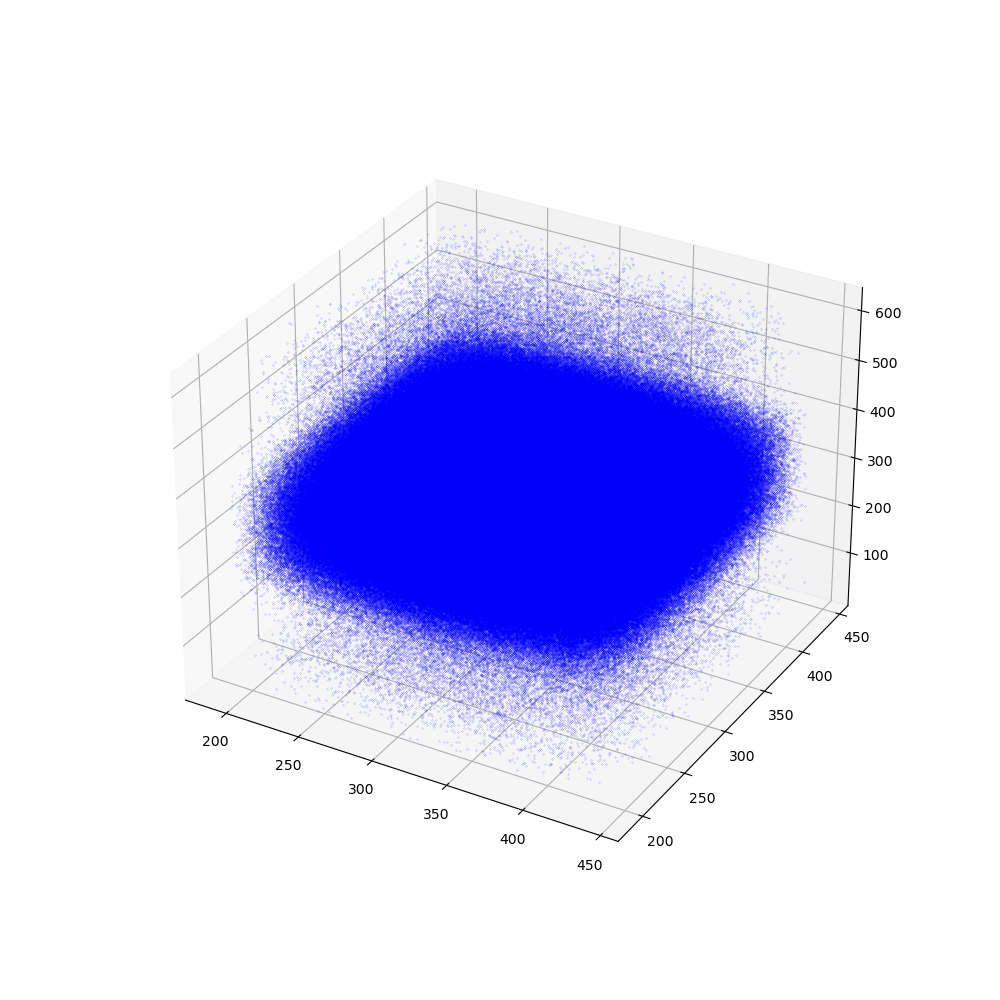

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(projection="3d")
plt.plot(x, y, z, "bo", markersize=0.1)

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

ics = h5py.File("ics.hdf5")

partData = ics["PartType0"]

pos = partData["Coordinates"]
nPart = np.shape(pos)[0]

splitPos = np.array_split(pos, 3, axis=1)

x = splitPos[0].reshape(nPart)
y = splitPos[1].reshape(nPart)
z = splitPos[2].reshape(nPart)

In [6]:
print(max(x))

1274.3803308677818


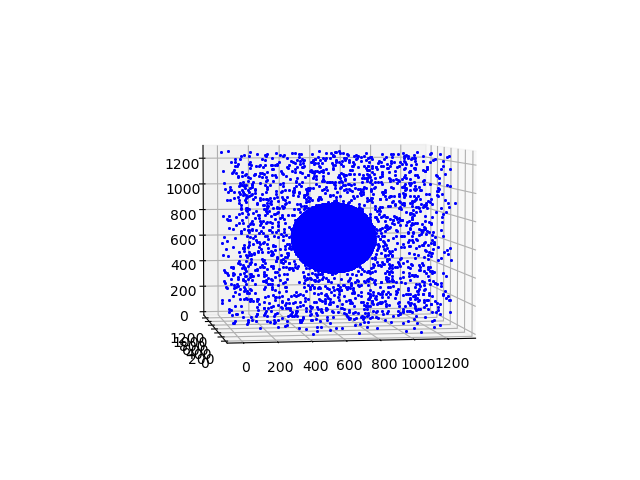

In [5]:
%matplotlib widget
plt.subplot(projection="3d")
plt.plot(x,y,z, "bo", markersize=1)
plt.show()

In [ ]:

        # Selecting part type 0 data
        data = snapshotFile["PartType0"]

        # Looping through each attribute 
        for att in attrs:
            # Extracting the attribute
            dat = data[att][:]

            if len(dat) == 0:
                pass
            else:
                # If conversion factor, get it and scale
                if att != "DustTemperature" and att != "ChemicalAbundances" and att != "PotentialPeak":
                    cgs = data[att].attrs.get("to_cgs")
                    dataDict[att] = np.multiply(dat, cgs)
                    dataDict[att] = dat
                else:
                    dataDict[att] = dat
        